# Forslag til case 1


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Oppgave 1: 10 poeng
a) Lag en kort fortelling i en python kode som inkluderer alle de fire typer variabler vi har lært om i kurset. Koden skal kunne kjøres med print(). Koden burde inneholde utregninger av elementer du har definert


### Oppgave 2 (10 poeng)

Leieprisene i landet har steget de siste månedene. Ved å bruke realistiske tall<br> 
a) Lag en tilbuds og etterspørselsfunksjoner for leie av bolig (Bruk av ikke-lineære funksjoner belønnes <br>
). <br> 





In [80]:
def supply(p):
    return 2*p
supply(4)

8

In [84]:
def demand(p):
    return 5/p
demand(1)

5.0

b) Vis at disse er henholdvis fallende og stigende, ved bruk av
- Regning
- figurativt (matplotlib) 
Husk å markere aksene tydelig

c) Kommenter funksjonene og likevekten. Vis gjerne figurativt hvor likevekten er

### Oppgave 3 (10 poeng)

SSB har omfattende data på befolkningsutvikling (https://www.ssb.no/statbank/table/05803/tableViewLayout1/). Disse dataene skal du bruke i de neste deloppgavene

a) lag lister av følgende variabler: "Befolkning 1. januar", "Døde i alt", "Innflyttinger" og "Utflyttinger". Bruk tall for perioden 2012-2021. Lag så en liste av disse liste. Du kan kalle den "SSB"


In [68]:
year = ["year", 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
population = ["population", 4985870,5051275,5109056,5165802,5213985,5258317,5295619,5328212,5367580,5391369]
died = ["died", 41992,41282,40394,40727,40726,40774,40840,40684,40611,42002]
immigrants = ["immigrants", 78570,75789,70030,67276,66800,58192,52485,52153,38071,53947]
emigrants = ["emigrants",31227,35716,31875,37474,40724,36843,34382,26826,26744,34297]

In [69]:
ssb = [year, population, died, immigrants, emigrants]

b) konverter "ssb" til en numpy matrise

In [70]:
import numpy as np
ssb_np=np.array(ssb)

c) Putt alle tallene inn i en egen matrise og konverter disse til int (utelat årstallene)

In [71]:
ssb_numbers=np.array(ssb_np[:, 1:],dtype=int)


In [72]:
ssb_numbers

array([[   2012,    2013,    2014,    2015,    2016,    2017,    2018,
           2019,    2020,    2021],
       [4985870, 5051275, 5109056, 5165802, 5213985, 5258317, 5295619,
        5328212, 5367580, 5391369],
       [  41992,   41282,   40394,   40727,   40726,   40774,   40840,
          40684,   40611,   42002],
       [  78570,   75789,   70030,   67276,   66800,   58192,   52485,
          52153,   38071,   53947],
       [  31227,   35716,   31875,   37474,   40724,   36843,   34382,
          26826,   26744,   34297]])

d) vis befolkningsutviklingen grafisk for de gjeldene årene. Vis befolkning på y-aksen i millioner

In [73]:
from matplotlib import pyplot as plt

Text(0.5, 0, 'Årstall')

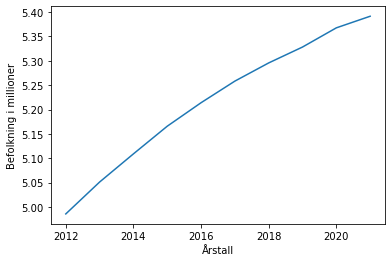

In [74]:
fig,ax=plt.subplots()
ax.plot(ssb_numbers[0, :], ssb_numbers[1, :]/1000000)
ax.set_ylabel("Befolkning i millioner")
ax.set_xlabel("Årstall")


e) Kunne man gjort dette ved bruk av oppslag? Hva ville fordelen med dette vært?

f) ekstrapoeng: Hva er den relative befolkningstilveksten (dvs. innvandring/utvandring). Hint: prøv å google "divide python list" og prøv deg frem. 

In [75]:
from operator import truediv
rel_immigration = list(map(truediv, immigrants[1:], emigrants[1:]))


In [76]:
rel_immigration

[2.5160918435968873,
 2.1219901444730653,
 2.197019607843137,
 1.7952713881624593,
 1.6403103820842746,
 1.5794587845723747,
 1.5265255075330115,
 1.9441213747856556,
 1.4235342506730482,
 1.5729364084322244]

## Oppgave 4 (20 poeng)

Et lån består som regel av et månedlig terminbeløp. Dette beløpet er summen av avdrag (nedbetalingen på lånet) og renter. Tenk at du låner 10 000 kr i banken i dag. <br>
a) Lag en funksjon som regner ut hvor mye lånet "x" koster deg over en periode på "t" år med en årlig rente "r". Det er månedlig "n" forrenting. Dette er et serielån så avdragene er like hver måned, men renten reduseres i takt med avdragene.

Formelt, kan vi la p definere hvilken mnd vi er i. Dvs, hvis p=15, har det gått 1 år og 3 mnd med terminer. Renteutgiftene for hele lånet vil derfor være summen av renten på gjenværende beløp for alle perioder p. Dette kan skrives slik   
$\sum_{p=1}^N(x-a*p)*{r/n}$

Hint: siden terminbeløpet varierer for hver måned (pga at rentene endres), må alle enkeltperioder summeres. Det kan være nyttige å bruke funksjonen np.arange() til dette.


In [6]:
#versjon 1: regn ut hvor mye lånet koster deg for ulik nedbetalingstid
def serie(x, r, t, n):
    avdrag = x/(t*n)
    rente = (x-avdrag*np.arange(0,t*n+1))*r/n
    return rente.sum()

b) regn ut hvor mye lånet koster deg med henholdsvis 10, 20 og 30 års tilbakebetaling. Anta 1 000 000 kr lånebeløp med 3% rente

In [14]:
print(f"Med 10 års tilbakebetaling koster lånet {round(serie(1000000, 0.03, 10, 12))} kr")
print(f"Med 20 års tilbakebetaling koster lånet {round(serie(1000000, 0.03, 20, 12))} kr")
print(f"Med 30 års tilbakebetaling koster lånet {round(serie(1000000, 0.03, 30, 12))} kr")

Med 10 års tilbakebetaling koster lånet 151250 kr
Med 20 års tilbakebetaling koster lånet 301250 kr
Med 30 års tilbakebetaling koster lånet 451250 kr


c) Vis hva det samme lånet koster som annuitetslån, dvs differansen mellom alle terminbeløp og lånebeløp. Annuitetslån gir like terminbeløp hver måned, men renten utgjør en større del av dette beløpet i starten. Terminbeløpet for et annuitetslån er definert ved formelen:
$T = x*\frac{r/n} {(1-(1+(r/n))^{-n*t})}$, hvor x=lånebeløp, r = rente, n = terminer hvert år, t = år





In [36]:
#først må vi finne ut hva termingebyret er 
def termin(x, r, t, n):
    mnd = r/n
    term = t*n
    return x*(mnd/(1-(1+mnd)**-term))

In [42]:
termin(1000, 0.03, 1, 12)

84.69369875849057

In [43]:
#kostnaden er summen av terminer minus lånebeløp
def cost(x, r, t, n):
    return termin(x, r, t, n)*n*t-x



In [44]:
print(f"Annuitetslånet med 10 års tilbakebetaling koster {round(cost(1000000, 0.03, 10, 12))}kr")
print(f"Annuitetslånet med 20 års tilbakebetaling koster {round(cost(1000000, 0.03, 20, 12))}kr")
print(f"Annuitetslånet med 30 års tilbakebetaling koster {round(cost(1000000, 0.03, 30, 12))}kr")

Annuitetslånet med 10 års tilbakebetaling koster 158729kr
Annuitetslånet med 20 års tilbakebetaling koster 331034kr
Annuitetslånet med 30 års tilbakebetaling koster 517775kr


c) Vis hvordan utviklingen i rentekostnader og avdrag på terminer for serielån grafisk. Bruk stackplot til dette. </br>
<b>Hint1:</b> siden avdragene er like for alle måneder, kan det være lurt å lage en liste. </br>
<b>Hint2:</b> Det kan være enklere å definere tid på enkeltmåneder når man skal vise det grafisk (ref, kommentar om periode p ovenfor) 


In [49]:
#samme som tidligere funksjon, men her tar vi ikke summen
def interest_rate_monthly_serie(x, r, term):
    avdrag = x/(term)
    rente = (x-avdrag*np.arange(0,term+1))*r/12
    return rente

In [50]:
#tester funksjonen
interest_rate_monthly_serie(1000, 0.03, 36)

array([2.5       , 2.43055556, 2.36111111, 2.29166667, 2.22222222,
       2.15277778, 2.08333333, 2.01388889, 1.94444444, 1.875     ,
       1.80555556, 1.73611111, 1.66666667, 1.59722222, 1.52777778,
       1.45833333, 1.38888889, 1.31944444, 1.25      , 1.18055556,
       1.11111111, 1.04166667, 0.97222222, 0.90277778, 0.83333333,
       0.76388889, 0.69444444, 0.625     , 0.55555556, 0.48611111,
       0.41666667, 0.34722222, 0.27777778, 0.20833333, 0.13888889,
       0.06944444, 0.        ])

In [47]:
#lager funksjon for downpayment
def down_payment(x, term):
    return x/term


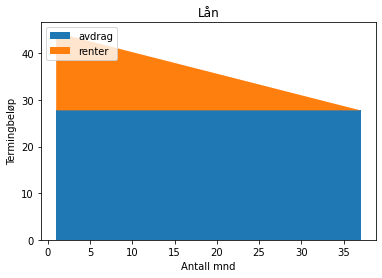

In [52]:
y = np.arange(1, 38, 1)
x = 37
x1 = [down_payment(1000,36)]*x
x2 = interest_rate_monthly_serie(1000, 0.2, 36)

fig, ax = plt.subplots()
ax.stackplot(y, x1, x2, labels=["avdrag", "renter"])
ax.legend(loc='upper left')
ax.set_title('Lån')
ax.set_xlabel('Antall mnd')
ax.set_ylabel('Termingbeløp')

plt.show()

# Ignorer det under 

c) Lag tre nye linjer som viser hva avkastningen er med henholdsvis 3% og 10% avkastning

d) inflasjon reduserer kjøpekraften av pengene dine i dag. Vis hva innskuddet i banken er verdt om 5 år (i "dagens penger"), gitt 0% rente

e) Hva er innskuddet verdt om 5 år hvis man forventer inflasjon på 6% og avkastning på 5%

f) ekstrapoeng: lag en graf hvor du inkluderer en log-funksjon og en eksponentialfunksjon. Kommenter disse. 

In [590]:
def termin_serie(x, r, term):
    avdrag = x/(term)
    rente = (x-avdrag*np.arange(0,term+1))*r/12
    return rente.sum()

In [591]:
termin_serie(1000, 0.03, 36)

46.25

In [612]:
def termin_annuitet(x, r, term):
    mnd = r/12
    return x*(mnd/(1-(1+mnd)**-term))*term-x

In [613]:
termin_annuitet(1000, 0.03, 36)

46.923546703504826

Text(0, 0.5, 'rentekostnader')

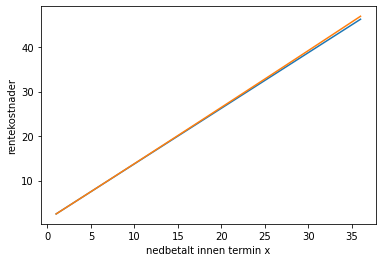

In [594]:
x = np.arange(1,37,1)
plt.plot(x, [termin_serie(1000, 0.03, i) for i in x])
plt.plot(x, [termin_annuitet(1000, 0.03, i) for i in x])

plt.xlabel("nedbetalt innen termin x")
plt.ylabel("rentekostnader")

In [ ]:
#versjon 2, her uten mnd:
def serie2(lån, rente, tid):
    avdrag = lån/tid
    res = 0
    for i in range(tid):
        res += (lån-i*avdrag)*rente
    return res